In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv(r"C:\Users\Pranab.Debnath\Downloads\UberDataset.csv")
dataset.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
dataset.shape

(1156, 7)

In [7]:
dataset.info

<bound method DataFrame.info of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1

In [8]:
dataset.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [10]:
dataset['PURPOSE'].fillna("NOT",inplace=True)

In [11]:
dataset['START_DATE']= pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE']= pd.to_datetime(dataset['END_DATE'],errors='coerce')

In [13]:
from datetime import datetime

# Extract date and hour from START_DATE
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['hour'] = pd.DatetimeIndex(dataset['START_DATE']).hour

# Changing into categories of day and night
dataset['day-night'] = pd.cut(
    x = dataset['hour'],
    bins = [0, 10, 15, 19, 24],
    labels = ['Morning', 'Afternoon', 'Evening', 'Night'],
    right = False
)

In [14]:
dataset.dropna(inplace=True)

In [15]:
dataset.drop_duplicates(inplace=True)

In [16]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 109, 'STOP': 113, 'PURPOSE': 7, 'date': 114}

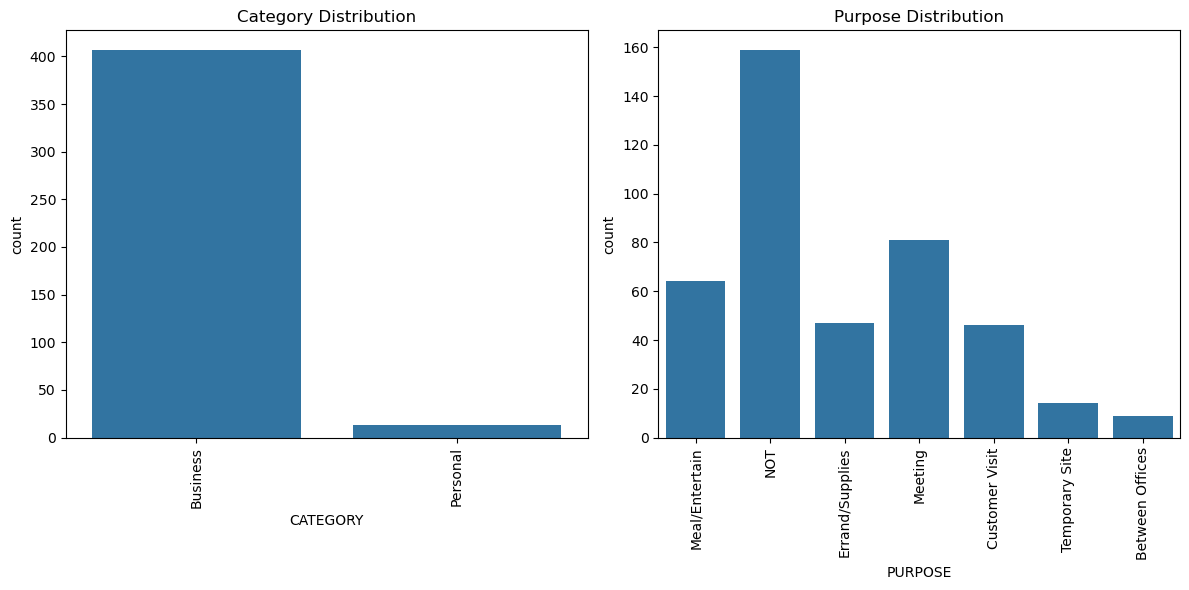

In [18]:
plt.figure(figsize=(12,6))  # Slightly wider for better spacing

# First subplot
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=dataset)
plt.xticks(rotation=90)
plt.title('Category Distribution')

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='PURPOSE', data=dataset)
plt.xticks(rotation=90)
plt.title('Purpose Distribution')

plt.tight_layout()
plt.show()


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

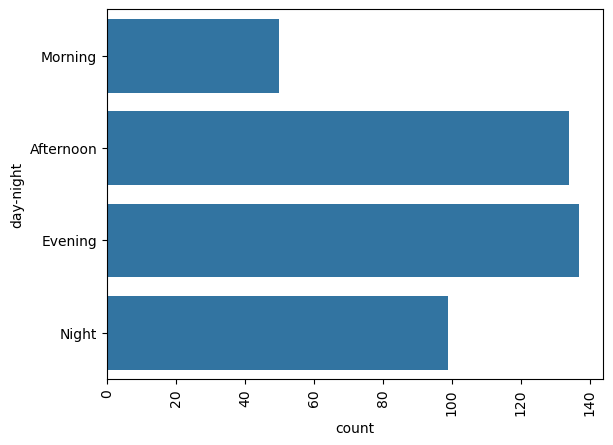

In [19]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)


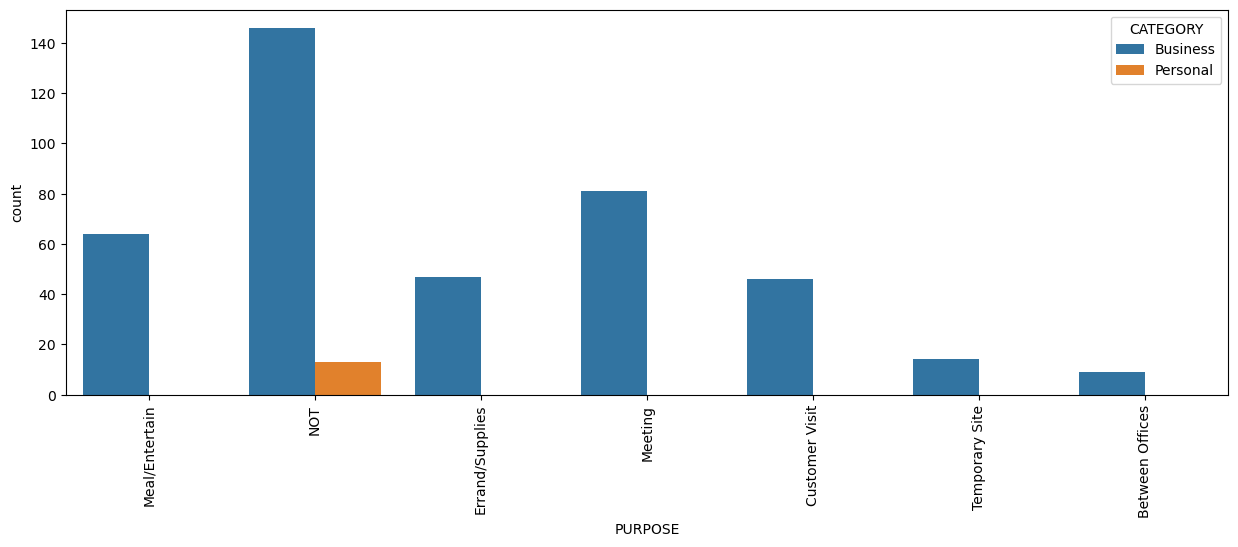

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()


In [23]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']

# Fix here ↓
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()

df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)


<Axes: >

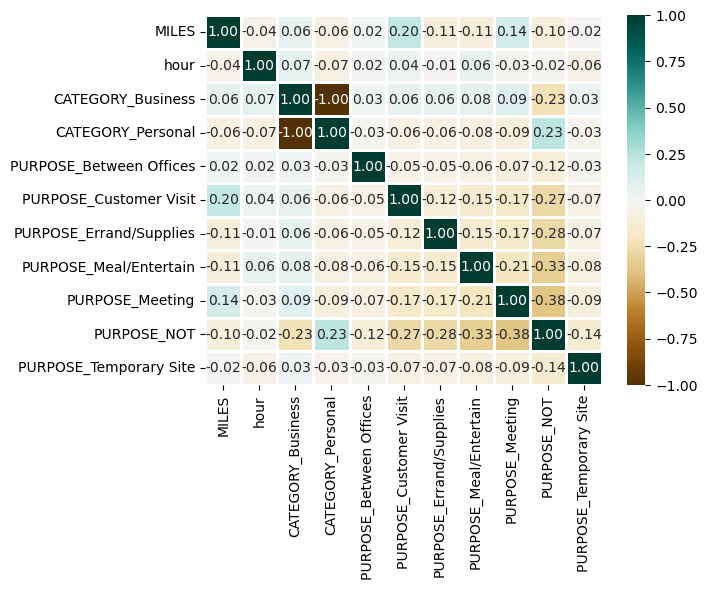

In [24]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)

# This code is modified by Susobhan Akhuli


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

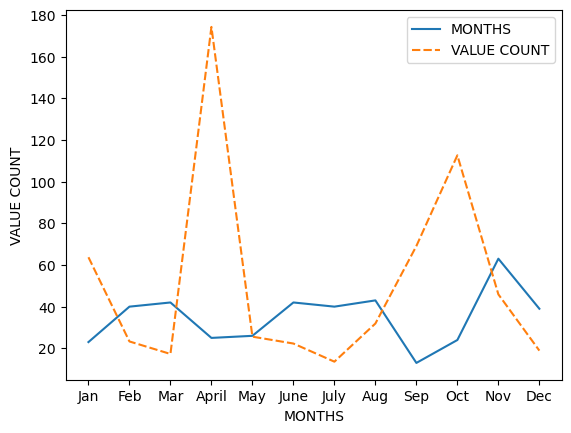

In [25]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


In [26]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)


Text(0, 0.5, 'COUNT')

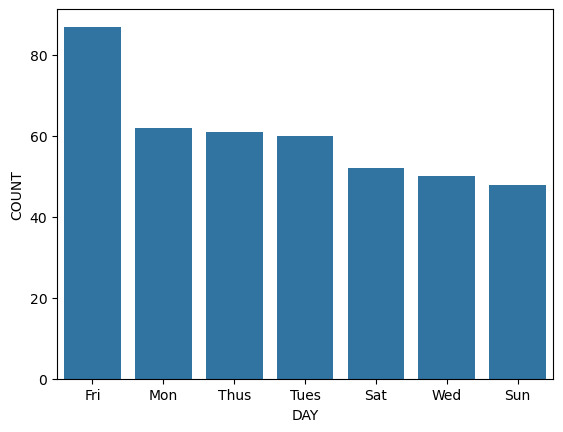

In [27]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


<Axes: ylabel='MILES'>

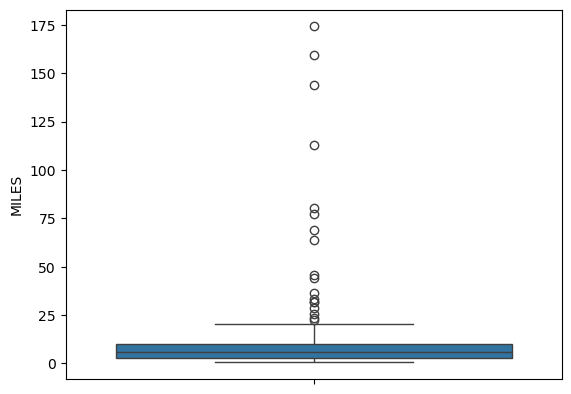

In [28]:
sns.boxplot(dataset['MILES'])


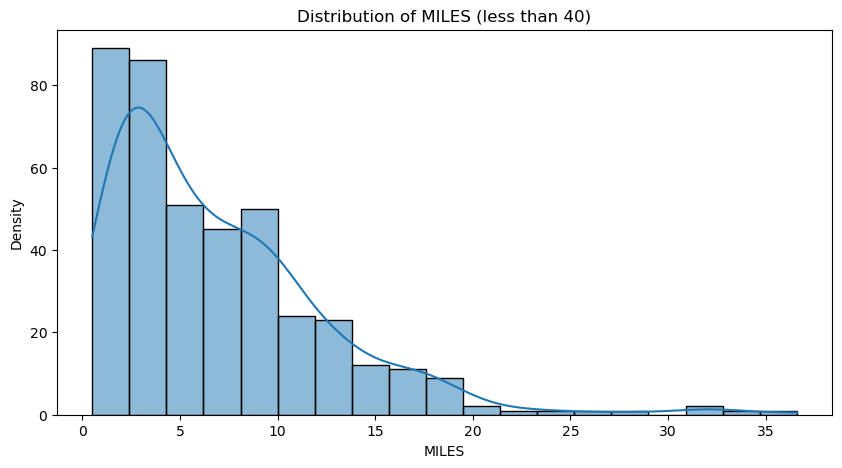

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Using histplot (best for single plot)
sns.histplot(data=dataset[dataset['MILES'] < 40], x='MILES', kde=True)

plt.title('Distribution of MILES (less than 40)')
plt.xlabel('MILES')
plt.ylabel('Density')
plt.show()
